In [ ]:
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library to split data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
import re, string

# import Natural Language Tool-Kit
import nltk

# import word prepocessors
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# import vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# read the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Tweets_US_airlines.csv")

In [ ]:
df.head(15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# summation of the Null values per column
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
# looking for duplicate rows
df.duplicated().sum()

36

In [ ]:
# remove the duplicate values
df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14604.0,5.692157e+17,7.782567e+14,5.675883e+17,5.685581e+17,5.694728e+17,5.698885e+17,5.703106e+17
airline_sentiment_confidence,14604.0,8.999228e-01,1.629550e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10503.0,6.376440e-01,3.303799e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14604.0,8.278554e-02,7.466473e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


**Exploratory Data Analysis (EDA)**

In [ ]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9159
neutral     3091
positive    2354
Name: count, dtype: int64

<ipython-input-15-1e07b3a85c82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='pastel')


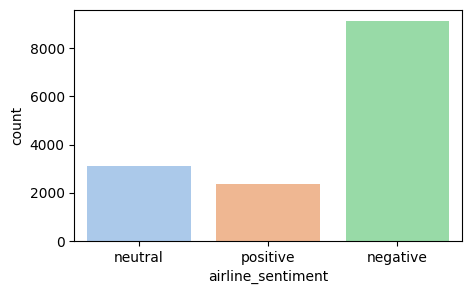

In [ ]:
# visualize the distribution of airline sentiments using a bar chart

plt.figure(figsize=(5, 3))
# df.airline_sentiment.value_counts().plot(kind='bar')
sns.countplot(data=df, x='airline_sentiment', palette='pastel')
plt.show()

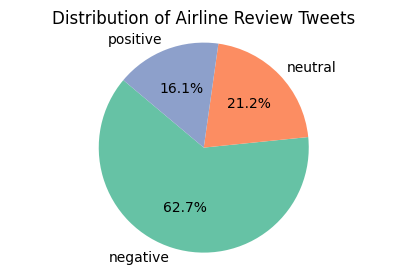

In [ ]:
# visualize the distribution of airline sentiments using a pie chart
sentiment_count = df['airline_sentiment'].value_counts()
plt.figure(figsize=(5,3))
plt.pie(sentiment_count, labels=sentiment_count.index, colors=sns.color_palette('Set2'), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Airline Review Tweets')
plt.show()

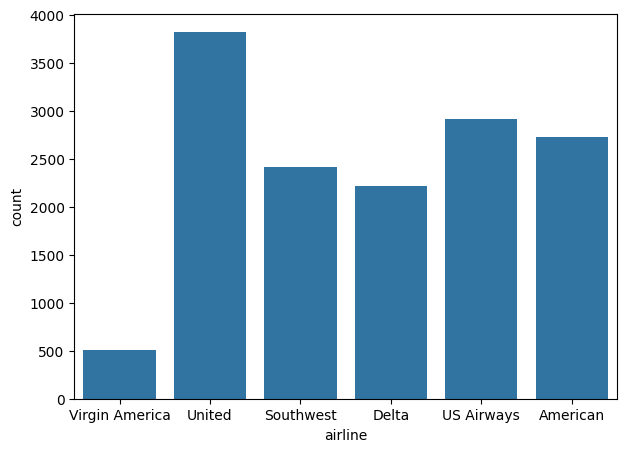

In [ ]:
# distribution of airlines
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='airline')
plt.show()

<Figure size 900x700 with 0 Axes>

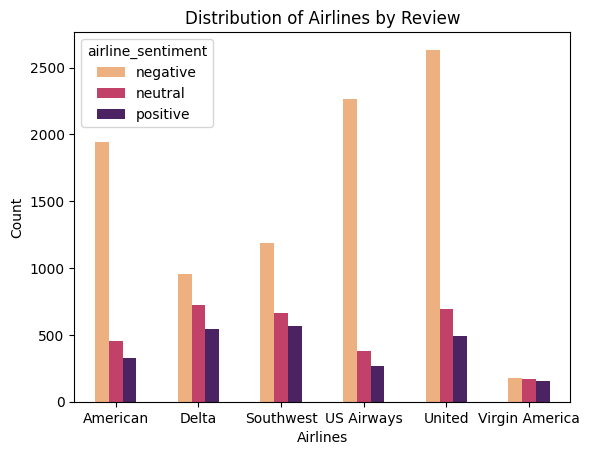

In [ ]:
# airlines respective sentiment

sentiment_airline_counts = pd.crosstab(df['airline'], df['airline_sentiment'])
plt.figure(figsize=(9, 7))
sentiment_airline_counts.plot(kind='bar', cmap='flare')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.title('Distribution of Airlines by Review')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['negativereason'].value_counts()

negativereason
Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

**Data Cleaning & Preprocessing**

In [ ]:
data = df[['text', 'airline_sentiment']]

In [ ]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)       # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove non-alphanumeric characters
    text = text.lower()                       # Convert to lowercase
    tokens = word_tokenize(text)              # Tokenize the text

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens into a single string separated by space
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
# apply preprocessing function to 'text' column
data['processed_text'] = data['text'].apply(preprocess_text)

<ipython-input-23-4b5d0a543d1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['text'].apply(preprocess_text)


**Word Cloud**

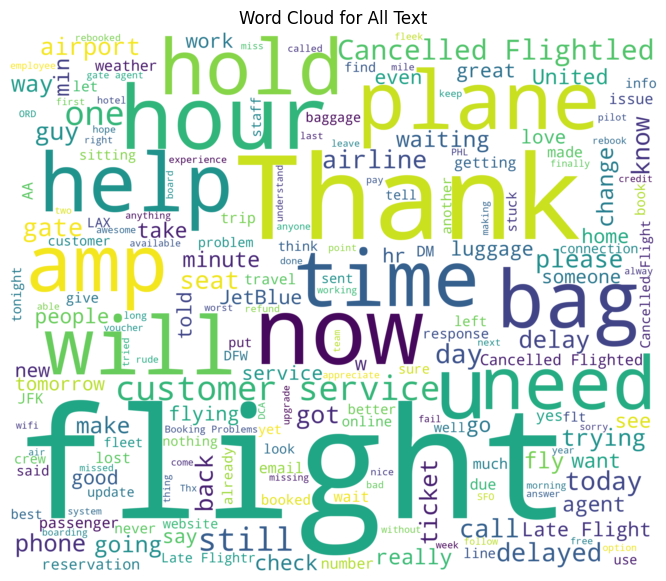

In [ ]:
# Combine all processed text into a single string for word cloud generation
all_text = ' '.join(data['text'])

cleaned_word = " ".join([word for word in all_text.split() if "http" not in word and not word.startswith("@") and word != "RT"])

# Generate the word cloud
word_cloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "white", width = 3000, height = 2500).generate(cleaned_word)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Text')
plt.show()

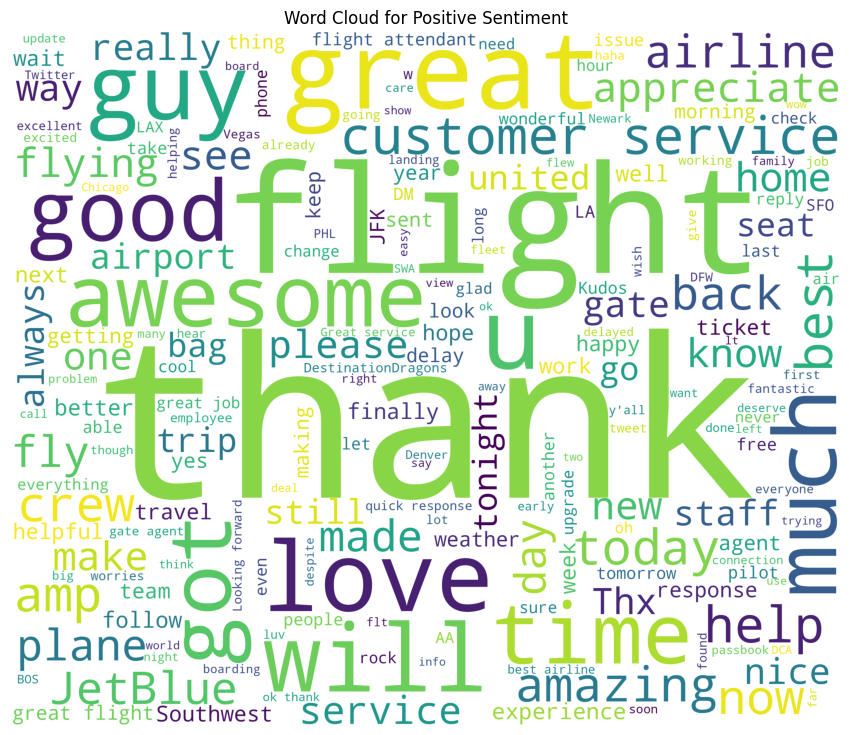

In [ ]:
# Filter data for positive sentiment

positive_text = data[data["airline_sentiment"] == "positive"]
positive_combined_text = " ".join(positive_text["text"])
p_cleaned_word = " ".join([word for word in positive_combined_text.split() if "http" not in word and not word.startswith("@") and word != "RT"])

positive_wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "white", width = 3000, height = 2500).generate(p_cleaned_word)
plt.figure(figsize = (12, 9))
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.title('Word Cloud for Positive Sentiment')
plt.show()

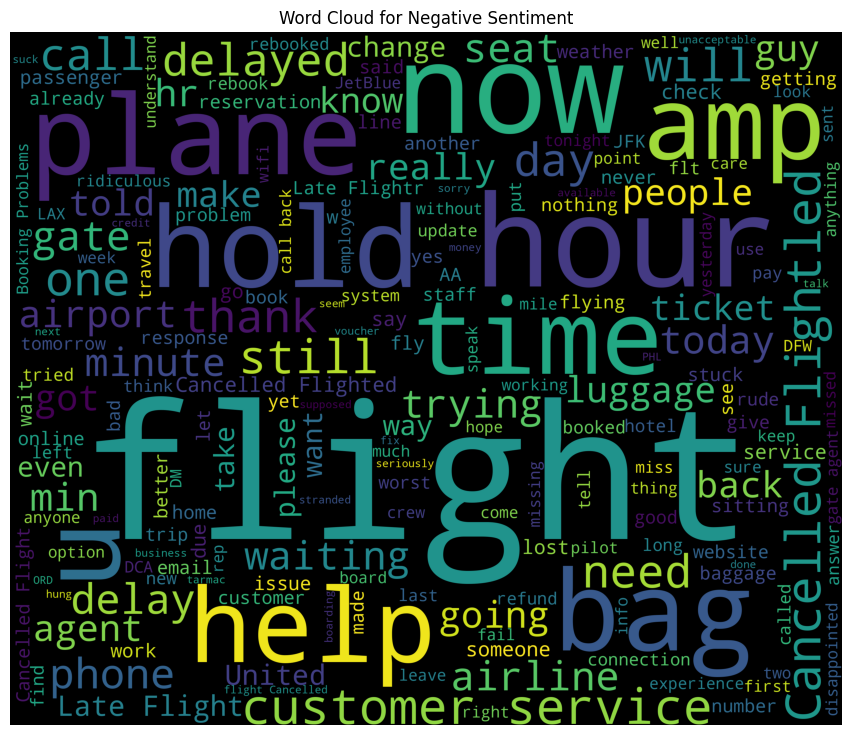

In [ ]:
# Filter data for negative sentiment

negative_text = data[data["airline_sentiment"] == "negative"]
negative_combined_text = " ".join(negative_text["text"])
ng_cleaned_word = " ".join([word for word in negative_combined_text.split() if "http" not in word and not word.startswith("@") and word != "RT"])

negative_wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(ng_cleaned_word)
plt.figure(figsize = (12, 9))
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.title('Word Cloud for Negative Sentiment')
plt.show()

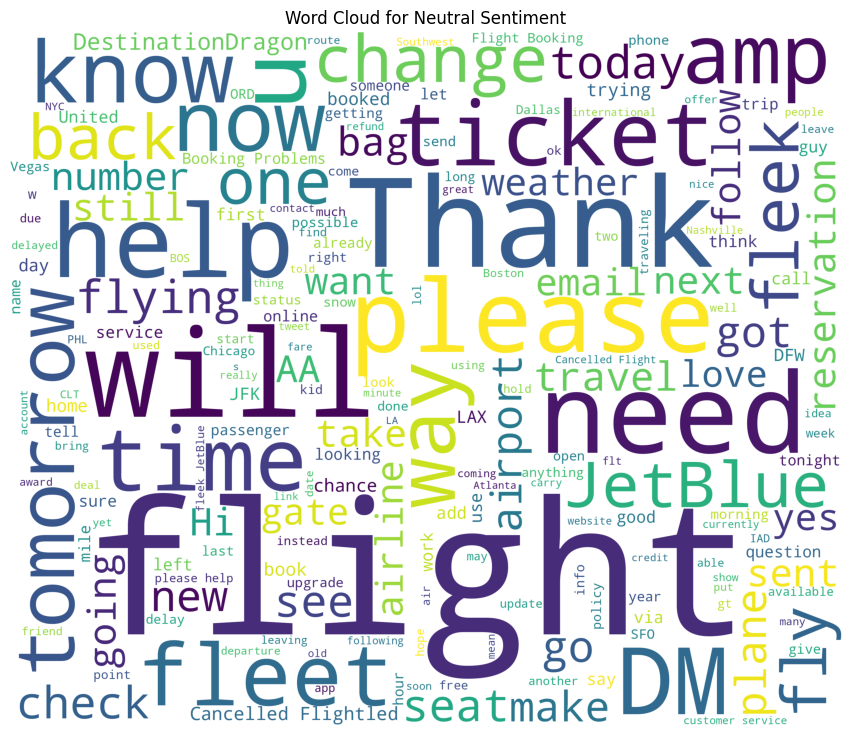

In [ ]:
# Filter data for neutral sentiment

neutral_text = data[data["airline_sentiment"] == "neutral"]
neutral_combined_text = " ".join(neutral_text["text"])
n_cleaned_word = " ".join([word for word in neutral_combined_text.split() if "http" not in word and not word.startswith("@") and word != "RT"])

neutral_wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "white", width = 3000, height = 2500).generate(n_cleaned_word)
plt.figure(figsize = (12, 9))
plt.imshow(neutral_wordcloud)
plt.axis("off")
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

In [ ]:
data.head()

,text,airline_sentiment,processed_text
0,@VirginAmerica What @dhepburn said.,neutral,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,positive,virginamerica plus youve added commercial expe...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,virginamerica didnt today must mean need take ...
3,@VirginAmerica it's really aggressive to blast...,negative,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,negative,virginamerica really big bad thing


In [ ]:
# Feature engineering
# Vectorization

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
# Fit and transform the preprocessed text data
X = vectorizer.fit_transform(data['processed_text']).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['airline_sentiment'] = label.fit_transform(data['airline_sentiment'])
data['airline_sentiment'].unique()

<ipython-input-31-4de8da760a4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['airline_sentiment'] = label.fit_transform(data['airline_sentiment'])


array([1, 2, 0])

In [ ]:
# target variable
y = data['airline_sentiment']

In [ ]:
vectorizer.vocabulary_

{'virginamerica': 11470,
 'dhepburn': 2869,
 'said': 9208,
 'plus': 8093,
 'youve': 12082,
 'added': 139,
 'commercial': 2067,
 'experience': 3646,
 'tacky': 10396,
 'didnt': 2885,
 'today': 10782,
 'mean': 6591,
 'need': 7082,
 'trip': 10951,
 'really': 8596,
 'aggressive': 227,
 'blast': 1152,
 'obnoxious': 7411,
 'entertainment': 3446,
 'guest': 4655,
 'face': 3702,
 'amp': 434,
 'little': 6184,
 'recourse': 8658,
 'big': 1100,
 'bad': 864,
 'thing': 10627,
 'seriously': 9459,
 'pay': 7835,
 'flight': 3949,
 'seat': 9373,
 'playing': 8056,
 'flying': 4068,
 'va': 11371,
 'yes': 12040,
 'nearly': 7079,
 'time': 10723,
 'fly': 4055,
 'vx': 11523,
 'ear': 3243,
 'worm': 11905,
 'wont': 11876,
 'away': 817,
 'missed': 6808,
 'prime': 8299,
 'opportunity': 7553,
 'men': 6652,
 'hat': 4761,
 'parody': 7767,
 'didntbut': 2886,
 'amazing': 393,
 'arrived': 641,
 'hour': 5042,
 'early': 3247,
 'youre': 12071,
 'good': 4506,
 'know': 5872,
 'suicide': 10238,
 'second': 9387,
 'leading': 6023,

In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**Model Building**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 75.49
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1880
           1       0.53      0.48      0.50       582
           2       0.69      0.61      0.65       459

    accuracy                           0.75      2921
   macro avg       0.68      0.65      0.67      2921
weighted avg       0.75      0.75      0.75      2921



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lg_m = lgc.fit(X_train, y_train)
lg_pred = lg_m.predict(X_test)
lgc_as = accuracy_score(y_test, lg_pred) * 100
lgc_as = "{:.2f}".format(lgc_as)
print('Accuracy of LG:', lgc_as)

print("Classification Report:")
print(classification_report(y_test, lg_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LG: 79.25
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1880
           1       0.61      0.57      0.59       582
           2       0.74      0.68      0.71       459

    accuracy                           0.79      2921
   macro avg       0.73      0.71      0.72      2921
weighted avg       0.79      0.79      0.79      2921



In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc_m = abc.fit(X_train, y_train)
abc_pred = abc_m.predict(X_test)
ab_as = accuracy_score(y_test, abc_pred) * 100
ab_as = "{:.2f}".format(ab_as)
print('Accuracy of AdaBoost:', ab_as)

print("Classification Report: ")
print(classification_report(y_test, abc_pred))

Accuracy of AdaBoost: 73.88
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1880
           1       0.48      0.40      0.44       582
           2       0.72      0.63      0.67       459

    accuracy                           0.74      2921
   macro avg       0.67      0.63      0.65      2921
weighted avg       0.73      0.74      0.73      2921



In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc_m = gbc.fit(X_train, y_train)
gbc_pred = gbc_m.predict(X_test)
gb_as = accuracy_score(y_test, gbc_pred) * 100
gb_as = "{:.2f}".format(gb_as)
print("Accuracy of Gradient Boost:", gb_as)

print("Classification Report: ")
print(classification_report(y_test, gbc_pred))

Accuracy of Gradient Boost: 74.19
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1880
           1       0.70      0.19      0.30       582
           2       0.72      0.56      0.63       459

    accuracy                           0.74      2921
   macro avg       0.72      0.57      0.59      2921
weighted avg       0.73      0.74      0.70      2921



In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc_m = xgc.fit(X_train, y_train)
xgc_pred = xgc_m.predict(X_test)
xg_as = accuracy_score(y_test, xgc_pred) * 100
xg_as = "{:.2f}".format(xg_as)
print("Accuracy of XGBoost:", xg_as)

print("Classification Report: ")
print(classification_report(y_test, xgc_pred))

Accuracy of XGBoost: 76.79
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1880
           1       0.60      0.41      0.48       582
           2       0.73      0.62      0.67       459

    accuracy                           0.77      2921
   macro avg       0.71      0.65      0.67      2921
weighted avg       0.75      0.77      0.75      2921



In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)
svm_model = svm_clf.fit(X_train, y_train)
svm_pre = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pre) * 100
svm_accuracy = "{:.2f}".format(svm_accuracy)
print("Accuracy of SVM:", svm_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svm_pre))

Accuracy of SVM: 78.02
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1880
           1       0.62      0.45      0.52       582
           2       0.77      0.60      0.67       459

    accuracy                           0.78      2921
   macro avg       0.73      0.66      0.69      2921
weighted avg       0.77      0.78      0.77      2921

